<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/DA_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Eigenvalues:
 [2.26433273 1.45573039 0.82395906 0.32074001 0.13561117]

Component Loadings:
 [[ 0.53302385  0.53231473 -0.2482432   0.40561272  0.45429092]
 [-0.42937867 -0.13181442  0.53568274  0.5395981   0.46918739]
 [ 0.14123454  0.58801687  0.71759941 -0.24203617 -0.24649248]
 [-0.1173      0.04210566 -0.00291383 -0.69547533  0.70765345]
 [ 0.70555868 -0.59306767  0.36940751 -0.0452191   0.10932069]]


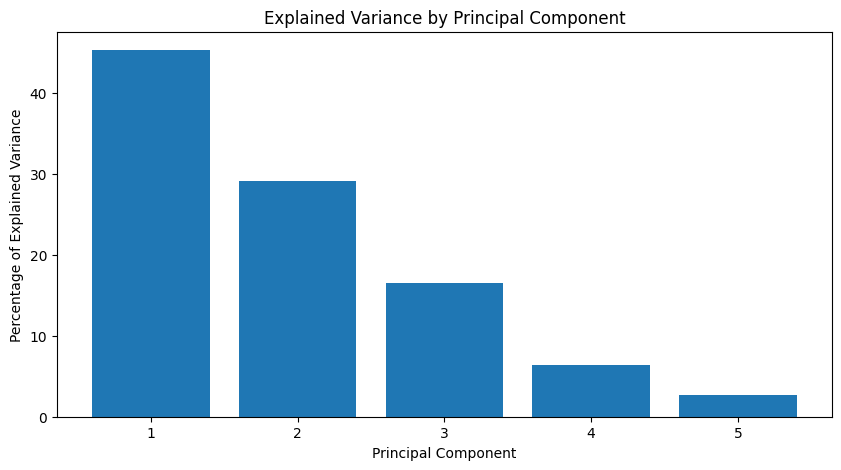

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Select numeric columns
numeric_cols = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic']
X = df[numeric_cols]

# Handle missing values by imputing with column means
X = X.fillna(X.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Perform PCA
pca = PCA()
pca_result = pca.fit(X_scaled)

# 4. Print PCA results (eigenvalues and component loadings)
eigenvalues = pca.explained_variance_
loadings = pca.components_

print("Eigenvalues:\n", eigenvalues)
print("\nComponent Loadings:\n", loadings)

# 5. Visualize PCA components
# Plot the explained variance ratio
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(eigenvalues) + 1), pca.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()



In [3]:
# Biplot function
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title("PCA Biplot")



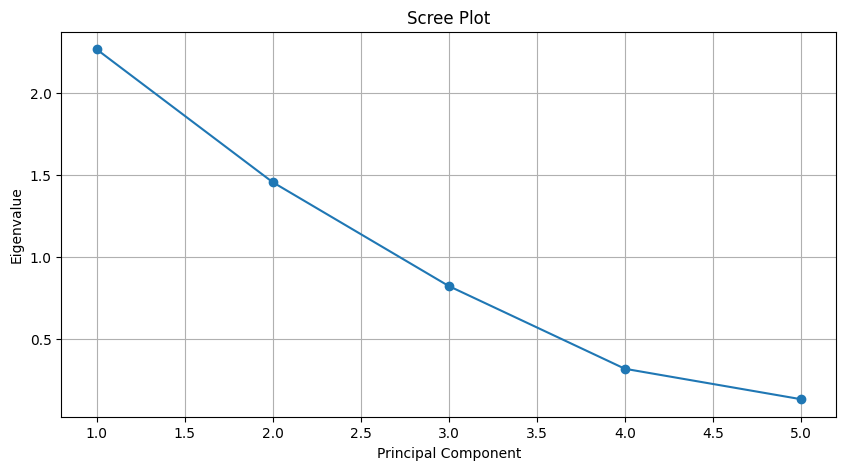

In [5]:

# 6. Create a scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

# 7. Select the number of components based on the scree plot (e.g., n_components = 2)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


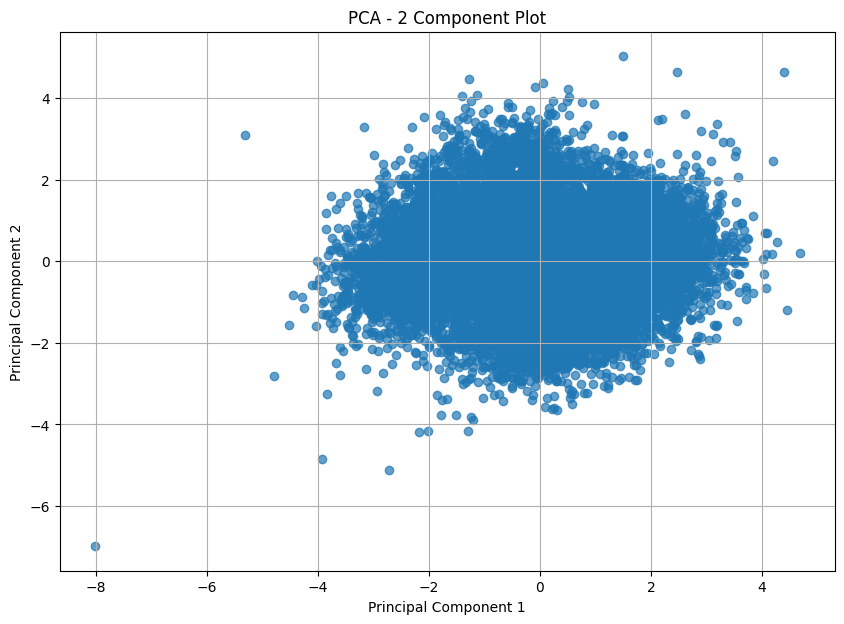

In [7]:

# 8. Plot the selected PCA components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Component Plot')
plt.grid()
plt.show()




Explained Variance by Selected Components:
 [0.45283273 0.29112434]


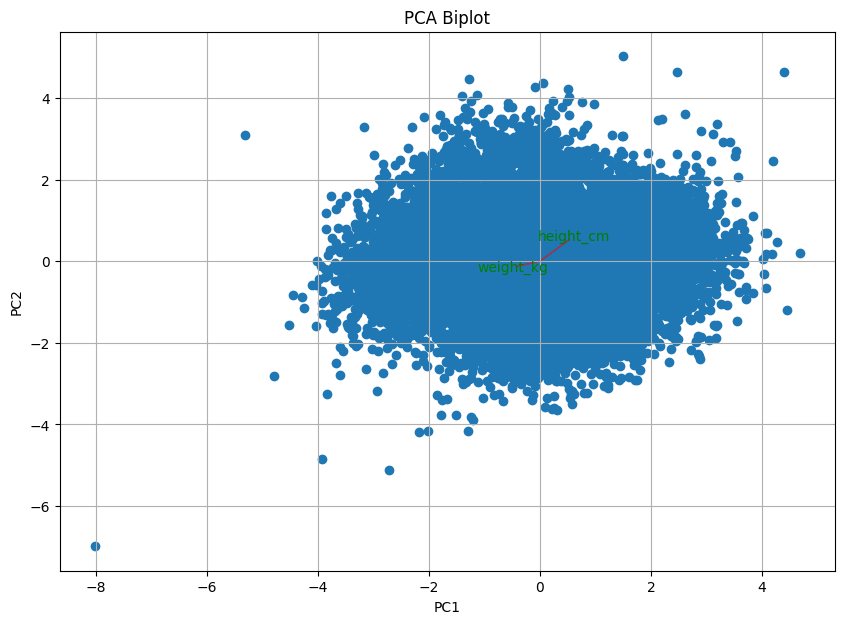

In [8]:
# 9. Biplot of the selected PCA components
biplot(X_pca, pca.components_, labels=numeric_cols)

# 10. Interpret the results
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Selected Components:\n", explained_variance)